# Intertemporal consumer problem

Team: M&M

Members: Markus Gorgone Larsen (hbk716) & Matias Bjørn Frydensberg Hall (pkt593)  

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from types import SimpleNamespace
import sympy as sm
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp

# Model description

We consider a standard **intertemporal consumer utility function in two periods** known from Macro II where:

* $C_t$ is consumption in period t
* $Y_t^L$ is labour income in period t
* $V_1$ is the intial wealth
* $T_t$ is tax payment in period t
* $\phi$ is the degree of impatience 
* $r$ is the real rental rate

all for $t\in\{1,2\}$  
We also have $C_t > 0$ and $\phi > 0$  

$$ U = u(C_1) + \frac{u(C_2)}{1+\phi}, \qquad u^{''} < 0 $$

Given **saving** in period 1 we can find **wealth in period 2**:

$$ V_2 = (1+r)\bigg(V_1+Y_1^L-T_1-C_1\bigg) = (1+r)S_1 $$

And **comsumption in period 2** becomes:

$$ C_2 = V_2 + Y_2^L - T_2 $$

Consolidating the two we get the **intertemporal budget constraint**:

$$C_1 + \frac{C_2}{1+r} = V_1+Y_1^L-T_1+\frac{Y_2^L-T_2}{1+r} $$

Inserting the expression for $C_2$ into the utility function we get:

$$ U = u(C_1) + \frac{u((1+r)(V_1+Y_1^L-T_1-C_1)+Y_2^L-T_2)}{1+\phi} $$

Assuming our consumer is risk averse we can use the following **utility function**:

$$ u(C_t) = lnC_t $$

Which gives us the following **maximisation problem** to solve:

$$ C_1^* = \text{arg}\max_{C_1} \, lnC_1 + \frac{ln((1+r)(V_1+Y_1^L-T_1-C_1)+Y_2^L-T_2)}{1+\phi} $$

Further more we know from solving the model analytical that the solution must satisfy:

$$ u'(C_1) = \frac{1+r}{1+\phi}u'(C_2) $$

# Algorithm

Given the model above we can now describe our algorithm:  

**Problem:** Solve the maximisation problem above  
**Inputs:** The variables mentioned above  
**Outputs:** $C_1, \, C_2, \, U$  
**Algorithm:** `U_optimize()`
  * Use scipy to numerically optimize U given parameters


# Solving the model

For simplicity income is the same in both periods, we set the level of impatience and rental rate equal to each other and close to zero, as the rental rate is close to zero right now. The initial endowment is also picked arbitrarily. Our above stated theory says that consumption must be the same in both periods with the following parameters.

In [2]:
# a. Create simplenamespace and set parameter values

par = SimpleNamespace()

par.r = 0.02
par.V_1 = 5
par.Y_L1 = 2
par.Y_L2 = 2
par.T_1 = 0.5
par.T_2 = 0.5
par.phi = 0.3

# b. Compute optimal housing quality, consumption and utility
c_1star, c_2star, u_star = mp.u_optimise(par)

# c. Print solution
print(f'The agent will choose optimal consumption in period 1 = {c_1star:.2f}, which implies optimal consumption in period 2 = {c_2star:.2f} and utility = {u_star:.2f}')


The agent will choose optimal consumption in period 1 = 4.51, which implies optimal consumption in period 2 = 3.53 and utility = 2.48


Our computation is what we could expect and we infer that the result is correct. Now we will get to the visualising of the results.

# Visualising consumption in both periods

For visualising the results we would like to show how varying degrees of impatience influence consumption in both periods. Likewise we would like to illustrate how different levels of rental rates affect consumption in both periods. Finally we would also like to show how varying income levels in both periods affect consumption.  

Our method will be the same for all 3:

1. Create array with relevant variable we want to change
2. Create empty containers for $C_1$, $C_2$ and U
3. Maximise U looping over the array and save values of $C_1$, $C_2$ and U in containers
4. Plot the findings

We have created a function that does the first 3 out of 4 steps. We start with impatience:

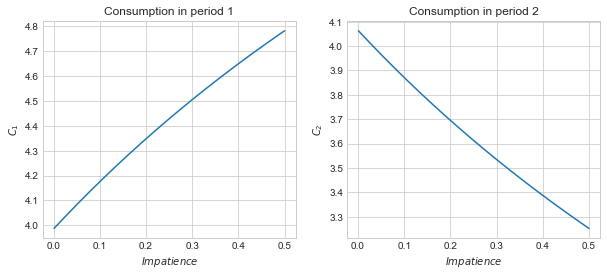

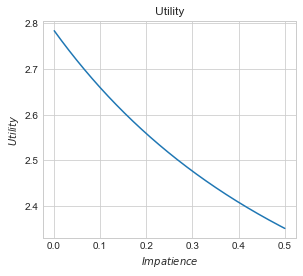

In [3]:
# a. Set number of objects and create array of phi's and container for C_1*, C_2* and U*
par.N = 1000

phi_vec, c1_vec, c2_vec, u_vec = mp.array(0.001, 0.5, par.N)

# b. Loop the optimise function over the phi_vec array
for i in range(par.N):
    par.phi = phi_vec[i]
    c1_vec[i], c2_vec[i], u_vec[i] = mp.u_optimise(par)

# c. Create graph and plot
mp.two_figures(phi_vec, c1_vec, "Consumption in period 1", "$Impatience$", "$C_1$", phi_vec, c2_vec, "Consumption in period 2", "$Impatience$", "$C_2$")
mp.one_figure(phi_vec, u_vec, "Utility", "$Impatience$", "$Utility$")

In [4]:
#Testing so far
#c1_vec, c2_vec, u_vec, phi_vec = mp.o_array(0.001,0.5,par.N, 'phi', par)
# c. Create graph and plot
#mp.two_figures(phi_vec, c1_vec, "Consumption in period 1", "$Impatience$", "$C_1$", phi_vec, c2_vec, "Consumption in period 2", "$Impatience$", "$C_2$")
#mp.one_figure(phi_vec, u_vec, "Utility", "$Impatience$", "$Utility$")

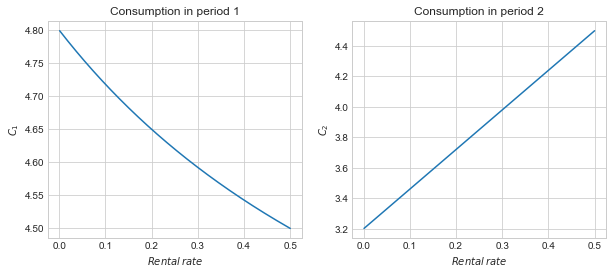

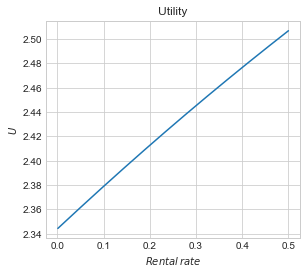

In [11]:
# a. Create array of phi's and container for C_1*, C_2* and U*
r_vec, c1_vec, c2_vec, u_vec = mp.array(0.001,0.5, par.N)

# b. Loop the optimise function over the phi_vec array
for i in range(par.N):
    par.r = r_vec[i]
    c1_vec[i], c2_vec[i], u_vec[i] = mp.u_optimise(par)

# c. Create graph and plot
mp.two_figures(r_vec, c1_vec, "Consumption in period 1", "$Rental \: rate$", "$C_1$", r_vec, c2_vec, "Consumption in period 2", "$Rental \: rate$", "$C_2$")
mp.one_figure(r_vec, u_vec, "Utility", "$Rental \: rate$", "$U$")

# How the rental rate and impatience affect allocation

# Extensions to the baseline model

Risk free rate and a non risk free rate with different rates of return

# Conclusion

In this assignment we have...

Further extensions to the model could be changing the utility function to be able to vary the degree of risk aversion. To make the model more realistic the tax could also be calculated from a constant tax rate based on the labour income, instead of being lump sum.